In [4]:
import pandas as pd

df = pd.read_csv('/content/sample_data/yelp_labelled.txt', names=['sentences', 'label'], sep='\t')
df.tail()

,sentences,label
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [5]:
from sklearn.model_selection import train_test_split

kalimat = df['sentences'].values
y = df['label'].values

kalimat_train, kalimat_test, y_train, y_test = train_test_split(kalimat, y, test_size=0.2)

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=250, oov_token='x')

tokenizer.fit_on_texts(kalimat_train)
tokenizer.fit_on_texts(kalimat_test)

sequences_train = tokenizer.texts_to_sequences(kalimat_train)
sequences_test = tokenizer.texts_to_sequences(kalimat_test)

padded_train = pad_sequences(sequences_train, maxlen=20)
padded_test = pad_sequences(sequences_test, maxlen=20)

In [8]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(250, 16, input_length=20),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
hist = model.fit(padded_train, y_train, epochs=30, validation_data=(padded_test, y_test), verbose = 2)

Epoch 1/30
25/25 - 1s - loss: 0.6925 - accuracy: 0.5325 - val_loss: 0.6912 - val_accuracy: 0.5800 - 1s/epoch - 41ms/step
Epoch 2/30
25/25 - 0s - loss: 0.6899 - accuracy: 0.5638 - val_loss: 0.6883 - val_accuracy: 0.5800 - 72ms/epoch - 3ms/step
Epoch 3/30
25/25 - 0s - loss: 0.6856 - accuracy: 0.5813 - val_loss: 0.6830 - val_accuracy: 0.5950 - 77ms/epoch - 3ms/step
Epoch 4/30
25/25 - 0s - loss: 0.6777 - accuracy: 0.6513 - val_loss: 0.6754 - val_accuracy: 0.6250 - 85ms/epoch - 3ms/step
Epoch 5/30
25/25 - 0s - loss: 0.6652 - accuracy: 0.6562 - val_loss: 0.6639 - val_accuracy: 0.6400 - 75ms/epoch - 3ms/step
Epoch 6/30
25/25 - 0s - loss: 0.6476 - accuracy: 0.7088 - val_loss: 0.6479 - val_accuracy: 0.6600 - 76ms/epoch - 3ms/step
Epoch 7/30
25/25 - 0s - loss: 0.6241 - accuracy: 0.7275 - val_loss: 0.6282 - val_accuracy: 0.6800 - 91ms/epoch - 4ms/step
Epoch 8/30
25/25 - 0s - loss: 0.5949 - accuracy: 0.7688 - val_loss: 0.6058 - val_accuracy: 0.7250 - 83ms/epoch - 3ms/step
Epoch 9/30
25/25 - 0s - l

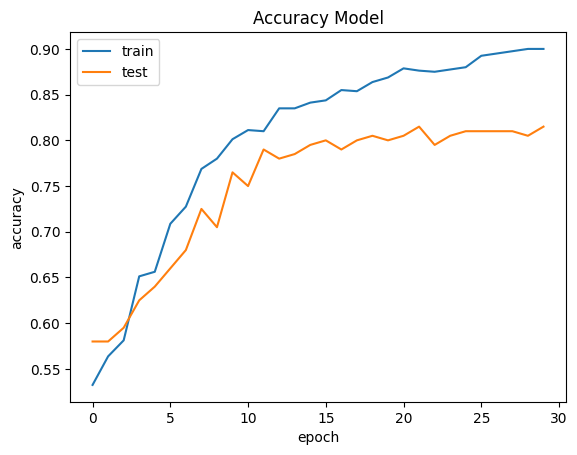

In [12]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Model')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

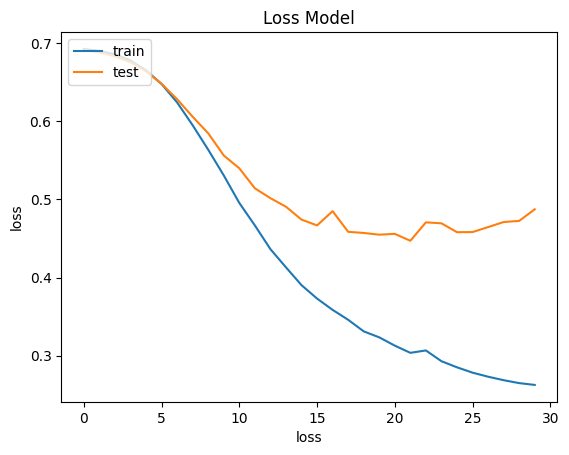

In [14]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('loss')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()